# Machine Learning in Bioinformatics

# Homework 2: 
 !!! If you don't fill these fields, your homework does not count !!!<by/>
 #### first name and last name :Amirreza Kazemi
 #### student number :95105827

You can run cells by hitting `Shift` + `Enter` or `ctrl` + `Enter`. <br/>
We highly recommend you to read each line of code carefully and try to understand what it exactly does. <br/>
Just alter the parts that is between green comments and specified for you. Please do not change other parts.

In [115]:
# importing libraries
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 10.0)

# Problem 1. soft margin SVM
### about the Data:<br/>
The purpose of this project is to classify tumors into malignant or benign. The following dataset is constructed based on images of tumors. Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass.
For more details about the features of this dataset you can visit this link:
https://scikit-learn.org/stable/datasets/index.html#breast-cancer-dataset<br/>
This dataset contains 30 features and 1 label that is called target. We should find a proper hyperplane that separates malignant and benign samples.
The original dataset labels is 0 and 1 and in the following code boxes we change it to -1 and 1.

In [116]:
cancer = load_breast_cancer()
df = pd.DataFrame(np.c_[cancer["data"], cancer["target"]], columns = np.append(cancer["feature_names"],["target"]))
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [117]:
cancer.target = np.where(cancer.target==0, -1, cancer.target) 
X_train ,X_test ,X_val ,y_train ,y_test ,y_val = None ,None ,None ,None ,None ,None
################################################################################
# TODO: using train_test_split package, split your data into 3 numpy array     #
# called X_train, X_test, and X_val and also split the corresponding labels as #
# y_train, y_test, and y_val. After spliting, the ratio of your data should be # 
# approximately like this:                                                     #
#  Train : 72%     test : 20%       validation : 8%                            #
################################################################################
#write your code here
#random state number is given as train_test_split function input to output data that are tested before.
X_train_val, X_test, y_train_val, y_test = train_test_split(cancer.data, cancer.target, test_size = 0.2, random_state = 9)
X_train, X_val , y_train, y_val = train_test_split(X_train_val, y_train_val, test_size = 0.1, random_state = 9)
################################################################################
#                                 END OF YOUR CODE                             #
################################################################################
print((X_train.shape[0]/cancer.data.shape[0]) * 100, "%")
print((y_train.shape[0]/cancer.data.shape[0]) * 100, "%")
print((X_test.shape[0]/cancer.data.shape[0]) * 100, "%")
print((y_test.shape[0]/cancer.data.shape[0]) * 100, "%")
print((X_val.shape[0]/cancer.data.shape[0]) * 100, "%")
print((y_val.shape[0]/cancer.data.shape[0]) * 100, "%")

71.8804920913884 %
71.8804920913884 %
20.035149384885763 %
20.035149384885763 %
8.084358523725834 %
8.084358523725834 %


### soft margin SVM optimization:<br/>
We add 1 at the beginning of each Xs data (X_train, X_val , ...) and then the bias will be calculated implicitly.
Then you should minimize the following SVM loss function (using gradient descent) with changing parameters of model.<br>
In this notation: 
\begin{equation}
x_i , y_i
\end{equation}
refers to feature vector of the sample and the label of our training data<br>
and this is SVM loss function:

\begin{equation}
\large
J(W) = \frac{1}{N} \sum_{i=1}^{N}{L^{(i)}} + \frac{\lambda}{2} ||W||^2\\
\large
L^{(i)} ={max(0, 1 - y_i(w^{T}x_i)})
\;\\
\end{equation} 


In [118]:
# >>>>>WARNING: RUN THIS CELL ONLY ONCE!<<<<<

# adding 1s to the end of feature vectors to be multiplied by bias term of weights
X_val = np.insert(X_val, 0, 1, axis=1)
X_train = np.insert(X_train, 0, 1, axis=1)
X_test = np.insert(X_test, 0, 1, axis=1)
print(X_train.shape)  
print(X_val.shape)  
print(X_test.shape) 

(409, 31)
(46, 31)
(114, 31)


Complete the following functions in SVM class. In the part that you should compute loss function of this class, you are not allowed to use "for" loop.

In [119]:
class SVM:
    def __init__(self, n_features: int, std: float):
        """
        n_features: number of features in (or the dimension of) each instance
        std: standard deviation used in the initialization of the weights of svm
        """
        self.n_features = n_features
        ################################################################################
        # TODO: Initialize the weights of svm using random normal distribution with    #
        # standard deviation equals to std.                                            #
        ################################################################################
        #write your code here
        self.weights = np.random.normal(0, std, self.n_features)
        ################################################################################
        #                                 END OF YOUR CODE                             #
        ################################################################################

    def loss(self, X: np.ndarray, y: np.ndarray, reg_coeff: float):
        """
        X: training instances as a 2d-array with shape (num_train, n_features)
        y: labels corresponsing to the given training instances as a 1d-array with shape (num_train,)
        reg_coeff: L2-regularization coefficient
        """
        #################################################################################
        # TODO: Compute the hinge loss specified in the notebook and save it in the loss#                                                   # loss variable.                                                               #
        # NOTE: YOU ARE NOT ALLOWED TO USE FOR LOOPS!                                   #
        # Don't forget L2-regularization term in your implementation!                   #
        #################################################################################
        
        #write your code here
        loss = 0.0
        term1 = 1 - y * np.dot(self.weights.T, X.T)
        term1 = np.where(term1 < 0, 0, term1)
        term2 = np.sum(term1) / np.size(term1)
        loss = term2 + (reg_coeff/2) * np.dot(self.weights, self.weights)

        ################################################################################
        #                                 END OF YOUR CODE                             #
        ################################################################################
        return loss
        
    def update_weights(self,  X: np.ndarray, y: np.ndarray, learning_rate: float , reg_coeff: float):
        """
        Updates the weights of the svm using the gradient of computed loss with respect to the weights. 
        learning_rate: learning rate that will be used in gradient descent to update the weights
        """
        ################################################################################
        # TODO: Compute the gradient of loss computed above w.r.t the svm weights.     #
        # and then update self.w with the computed gradient.                           #
        # (don't forget learning rate and reg_coeff in update rule)                    #
        # Don't forget L2-regularization term in your implementation!                  #
        ################################################################################
        #write your code here
        term1 = 1 - y * np.dot(self.weights.T, X.T)
        mask = np.where(term1 < 0)
        term2 = np.multiply(X, -1 * y[:, np.newaxis])
        term2[mask] = 0
        dterm2 = np.sum(term2, axis=0) / X.shape[0]
        dloss = dterm2 + reg_coeff * self.weights
        self.weights -= learning_rate * dloss
        ################################################################################
        #                                 END OF YOUR CODE                             #
        ################################################################################
    def predict(self, X):
        """
        X: Numpy 2d-array of instances
        """
        y_pred = None
        ################################################################################
        # TODO: predict the labels for the instances in X and save them in y_pred.     #                                      #
        ################################################################################
        #write your code here
        term1 = np.dot(self.weights.T, X.T)
        y_pred = np.where(term1 >= 0, 1, -1)

        ################################################################################
        #                                 END OF YOUR CODE                             #
        ################################################################################
        return y_pred


This cell contains your hyper parameters:

In [120]:
std = 0.0001
num_iters = 15000
reg_coeff = 20
learning_rate=1e-7

In this cell using your SVM class, we want to train our model for cancer data:<br/>
In every iteration you should see your training loss decrease.

In [121]:
from sklearn.metrics import accuracy_score
model = SVM(n_features=X_train.shape[1], std= std )
loss_history = []
loss_val_history = []
for it in range(num_iters):
    loss = model.loss(X_train, y_train, reg_coeff)
    loss_val = model.loss(X_val, y_val, reg_coeff)
    if it % 100 == 0:
        val_preds =  model.predict(X_val)
        print('iteration %d, loss %f, val acc %.2f%%' % (it, loss,  accuracy_score(y_val,val_preds) * 100))
    model.update_weights(X_train, y_train, learning_rate , reg_coeff)
    loss_history.append(loss)
    loss_val_history.append(loss_val)

iteration 0, loss 0.969887, val acc 41.30%
iteration 100, loss 0.916257, val acc 41.30%
iteration 200, loss 0.900738, val acc 41.30%
iteration 300, loss 0.886220, val acc 41.30%
iteration 400, loss 0.872381, val acc 41.30%
iteration 500, loss 0.859083, val acc 41.30%
iteration 600, loss 0.845812, val acc 41.30%
iteration 700, loss 0.832548, val acc 43.48%
iteration 800, loss 0.819304, val acc 50.00%
iteration 900, loss 0.806208, val acc 63.04%
iteration 1000, loss 0.793181, val acc 65.22%
iteration 1100, loss 0.780209, val acc 76.09%
iteration 1200, loss 0.767242, val acc 84.78%
iteration 1300, loss 0.754347, val acc 89.13%
iteration 1400, loss 0.741523, val acc 93.48%
iteration 1500, loss 0.728703, val acc 91.30%
iteration 1600, loss 0.715932, val acc 89.13%
iteration 1700, loss 0.703309, val acc 89.13%
iteration 1800, loss 0.690717, val acc 89.13%
iteration 1900, loss 0.678130, val acc 89.13%
iteration 2000, loss 0.665556, val acc 86.96%
iteration 2100, loss 0.653068, val acc 84.78%


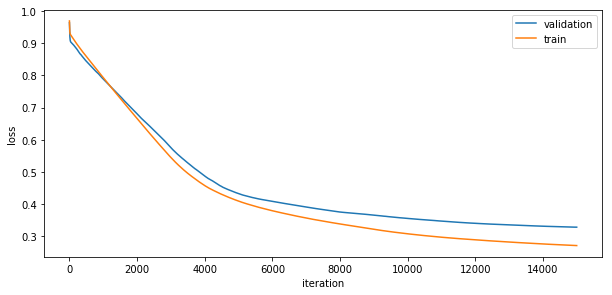

In [122]:
####################################################################################
# TODO: using matplotlib.pyplot package plot the training loss and validation loss #
# using loss_loss_history and loss_val_history                                     #
####################################################################################

#write your code here
plt.subplot(2, 1, 2)
plt.plot(loss_val_history, label='validation')
plt.plot(loss_history, label='train')
plt.ylabel("loss")
plt.xlabel("iteration")
plt.legend()
plt.show()


####################################################################################
#                                 END OF YOUR CODE                                 #
####################################################################################


### Question 1:
With changing your hyper parameters, find a configuration of hyper parameters that cause your loss to increase after each iteration and then report that configuration in the next cell. Explain why our loss increases?
Write your answer in ""

std = "0.0001" <br>
num_iters = "15000"<br>
reg_coeff = "20"<br>
learning_rate = "1e-1"<br>

### Question 2:
In this cell please explain the reason of this event<br>
Answer:
if alpha hyperparameter set too big , it causes that loss function diverges and therefore in each iteration loss increaces . it derives from taylor's formula in a way that if alpha is greater that epsilon , $f(x - \alpha * \nabla f) >= f(x)$

In [123]:
val_preds =  model.predict(X_test)
###########################################################################################
# TODO: find the Confusion Matrix between val_preds and real labels (y_test) for test data#
# then report the accuracy of the model.                                                  #
# you are not allowed to use any premade function for accuracy and confusion matrix       #
###########################################################################################

#write your code here
def confusion_matrix(val_preds, y_test):
    numOfSamples = np.size(val_preds)
    numOfSamples2 = np.size(y_test)
    if numOfSamples is not numOfSamples2:
        return "invalid state to compute accuracy"
    FP, FN, TN, TP = 0, 0, 0, 0
    for i in range(numOfSamples):
        if val_preds[i] == 1 and y_test[i] == 1:
            TP += 1
        elif val_preds[i] == 1 and y_test[i] == -1:
            FP += 1
        elif val_preds[i] == -1 and y_test[i] == 1:
            FN += 1
        elif val_preds[i] == -1 and y_test[i] == -1:
            TN += 1
    array = [[TP, FP], [FN, TN]]       
    return array
def accuracy(confusion_matrix):
    acc = (array[0][0] + array[1][1]) / (array[0][0] + array[1][1] + array[0][1] + array[1][0])
    return acc
array = confusion_matrix(val_preds, y_test)
print(array)
print(accuracy(array))


###########################################################################################
#                                END OF YOUR EXPLANATION                                  #
###########################################################################################


[[74, 8], [0, 32]]
0.9298245614035088


In the next part, we sample from training data with certain size (batch size) instead of using all the training data in each iteration, and train our model on batch data:

In [124]:
std = 0.0001
batch_size = 200
num_iters = 15000
reg_coeff = 20
learning_rate=1e-8
model = SVM(n_features=X_train.shape[1], std= std )

In [125]:
loss_history = []
loss_val_history = []
for it in range(num_iters):
    X_batch = None
    y_batch = None
    ################################################################################
    # TODO: Sample batch_size elements from the training data and their            #
    # corresponding labels to use in this round of gradient descent.               #
    # Store the data in X_batch and their corresponding labels in                  #
    # y_batch; after sampling X_batch should have shape (batch_size, n_features)   #
    # and y_batch should have shape (batch_size,)                                  #
    #                                                                              #
    # Hint: Use np.random.choice to generate indices. Sampling with                #
    # replacement is faster than sampling without replacement.                     #
    ################################################################################
    #write your code here
    mask = np.random.choice(X_train.shape[0], batch_size, replace=True)
    X_batch = X_train[mask]
    y_batch = y_train[mask]
    ################################################################################
    #                                 END OF YOUR CODE                             #
    ################################################################################
    loss = model.loss(X_batch, y_batch, reg_coeff)
    loss_val = model.loss(X_val, y_val, reg_coeff)
    if it % 100 == 0:
        val_preds =  model.predict(X_val)
        print('iteration %d, loss %f, val acc %.2f%%' % (it, loss,  accuracy_score(y_val,val_preds) * 100))
    model.update_weights(X_batch, y_batch, learning_rate , reg_coeff)
    loss_history.append(loss)
    loss_val_history.append(loss_val)

iteration 0, loss 0.961895, val acc 41.30%
iteration 100, loss 0.902825, val acc 41.30%
iteration 200, loss 0.946422, val acc 41.30%
iteration 300, loss 0.959690, val acc 41.30%
iteration 400, loss 0.993068, val acc 41.30%
iteration 500, loss 0.904941, val acc 41.30%
iteration 600, loss 0.921123, val acc 41.30%
iteration 700, loss 0.905418, val acc 41.30%
iteration 800, loss 0.869951, val acc 41.30%
iteration 900, loss 0.894840, val acc 41.30%
iteration 1000, loss 0.949034, val acc 41.30%
iteration 1100, loss 0.906046, val acc 41.30%
iteration 1200, loss 0.915586, val acc 41.30%
iteration 1300, loss 0.887216, val acc 41.30%
iteration 1400, loss 0.898429, val acc 41.30%
iteration 1500, loss 0.928627, val acc 41.30%
iteration 1600, loss 0.879738, val acc 41.30%
iteration 1700, loss 0.857742, val acc 41.30%
iteration 1800, loss 0.971214, val acc 41.30%
iteration 1900, loss 0.899007, val acc 41.30%
iteration 2000, loss 0.885353, val acc 41.30%
iteration 2100, loss 0.936155, val acc 41.30%


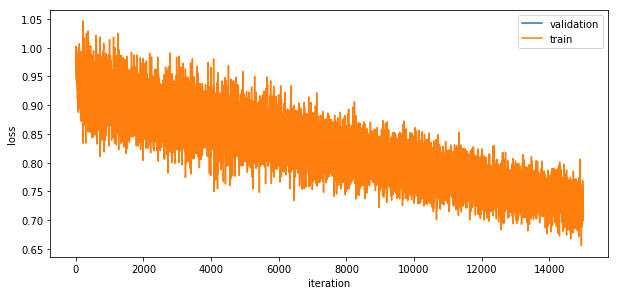

In [126]:
####################################################################################
# TODO: using matplotlib.pyplot package plot the training loss and validation loss #

####################################################################################

#write your code here
plt.subplot(2, 1, 2)
plt.plot(loss_val_history, label='validation')
plt.plot(loss_history, label='train')
plt.ylabel("loss")
plt.xlabel("iteration")
plt.legend()
plt.show()
####################################################################################
#                                 END OF YOUR CODE                                 #
####################################################################################

### Question 3:
Explain why we see fluctuation in this plot?<br>
Answer: we see fluctuation because we just used a batch of data to update weights and however loss for this batch would decrease but whole data loss may increase and we save whole data loss , so there are fluctuations .  

# Problem 2. Perceptron

By now, you should know how to use and how to implement SVM from scratch.
In fact, for perceptron we can use premade functions as below:

In [127]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X_train, y_train)
val_preds = clf.predict(X_test)
print(confusion_matrix(y_test,val_preds,[1,-1]))
print('test acc %.2f%%' % (accuracy_score(y_test,val_preds) * 100)) 

[[60 14]
 [ 2 38]]
test acc 85.96%


### Question 4:
It is time for you to write your own code instead of completing some parts of a premade code.<br>
So you can not use any premade functions like the previous cell.
Write your code in the end of this .ipynb file <br>
You should make your model and use that to build these outputs:<br>
1- Report loss of training and accuracy of validation data on each epoch of training process.<br>
2- You are allowed to use any normalization approach if need be.<br>
3- Plot your training and validation loss vs number of iterations in one plot.<br>
4- Finally print your confusion matrix and accuracy for your testing set.<br>
With changing your hyperparameters try to get a good and reasonable accuracy and confusion matrix on testing set (similar to the accuracy when we used the package).

In [128]:
std = 0.0001
num_iters = 1500
loss_history = []
loss_val_history = []

class Perceptron:
    def __init__(self, n_features, std):
        self.n_features = n_features
        self.weights = np.random.normal(0, std, self.n_features)
    def predict_a_data(self, X_i):
        y_i = np.dot(self.weights.T, X_i)
        if y_i > 0:
            return 1
        else:
            return -1
        return y_i
    def update_weights(self, X_i, y_i):
        self.weights += y_i * X_i
    def predict_all_data(self, X):
        y = np.where(np.dot(X, self.weights.T) > 0, 1, -1)
        return y
    def loss(self, X, y):
        term0 = np.dot(self.weights.T, X.T)
        term1 = 1 - np.multiply(term0, y.T)
        term2 = np.where(term1 > 0, term1, 0)
        return np.sum(term2, 0)
    
classifier = Perceptron(X_train.shape[1], std)
for i in range(num_iters):
    for j in range(X_train.shape[0]):
        y_label = classifier.predict_a_data(X_train[j])
        if y_train[j] != y_label:
            classifier.update_weights(X_train[j], y_train[j])
            
    loss_history.append(classifier.loss(X_train, y_train))
    loss_val_history.append(classifier.loss(X_val, y_val))
    val_preds = classifier.predict_all_data(X_val)
    array = confusion_matrix(val_preds, y_val)
    print("validation accuracy", accuracy(array), "train loss", loss_val_history[-1], "val loss", loss_history[-1])
    



validation accuracy 0.8043478260869565 train loss 1891292.460010605 val loss 12467151.616021529
validation accuracy 0.5869565217391305 train loss 22689197.49376817 val loss 188297149.58243844
validation accuracy 0.6086956521739131 train loss 16271025.997713814 val loss 128345184.820003
validation accuracy 0.6086956521739131 train loss 14589528.80209918 val loss 114279890.20706485
validation accuracy 0.6086956521739131 train loss 15541465.490748834 val loss 121810727.55407636
validation accuracy 0.8043478260869565 train loss 3406013.686792938 val loss 19115704.929657087
validation accuracy 0.6739130434782609 train loss 11071774.073575761 val loss 85327659.38581845
validation accuracy 0.6739130434782609 train loss 10761452.148693562 val loss 83010713.4485977
validation accuracy 0.6739130434782609 train loss 11008868.11798347 val loss 85017875.48484933
validation accuracy 0.7608695652173914 train loss 8862702.79289803 val loss 65083683.84701512
validation accuracy 0.6739130434782609 train

validation accuracy 0.8043478260869565 train loss 10230970.625417555 val loss 56631271.24442776
validation accuracy 0.8043478260869565 train loss 8913829.081647558 val loss 47102735.023347974
validation accuracy 0.8260869565217391 train loss 6865060.87630929 val loss 32881338.942764167
validation accuracy 0.8260869565217391 train loss 6941221.937710179 val loss 33314341.36067771
validation accuracy 0.8260869565217391 train loss 7017382.999111072 val loss 33756067.96080831
validation accuracy 0.8260869565217391 train loss 6764691.840990629 val loss 32158608.69987688
validation accuracy 0.8260869565217391 train loss 6840852.902391523 val loss 32590538.757908918
validation accuracy 0.8260869565217391 train loss 6917013.963792412 val loss 33023541.175822474
validation accuracy 0.8260869565217391 train loss 6993175.0251933 val loss 33456543.59373601
validation accuracy 0.8478260869565217 train loss 6592459.941306133 val loss 30784772.601885952
validation accuracy 0.8478260869565217 train lo

validation accuracy 0.8043478260869565 train loss 9239583.922626052 val loss 46214977.5471344
validation accuracy 0.8260869565217391 train loss 8013654.872840948 val loss 37299001.67131491
validation accuracy 0.8043478260869565 train loss 9113903.905024398 val loss 45329657.37814893
validation accuracy 0.8260869565217391 train loss 7907915.980889818 val loss 36542473.99878201
validation accuracy 0.8260869565217391 train loss 8993334.876914473 val loss 44469856.17090538
validation accuracy 0.8260869565217391 train loss 7803833.472389219 val loss 35833564.31720939
validation accuracy 0.8260869565217391 train loss 8889252.36841387 val loss 43669885.69742382
validation accuracy 0.8260869565217391 train loss 8121571.105618356 val loss 37967812.498676196
validation accuracy 0.8043478260869565 train loss 9238466.624005554 val loss 46093716.98353658
validation accuracy 0.8260869565217391 train loss 8015832.213667228 val loss 37197511.68936018
validation accuracy 0.8043478260869565 train loss 9

validation accuracy 0.8260869565217391 train loss 7644930.409033093 val loss 33431787.82352136
validation accuracy 0.8260869565217391 train loss 8729511.558857262 val loss 40190211.61997986
validation accuracy 0.8913043478260869 train loss 1625476.7106003496 val loss 10763854.48432048
validation accuracy 0.8260869565217391 train loss 7487921.576358438 val loss 32474351.122913525
validation accuracy 0.8260869565217391 train loss 8572502.726182617 val loss 39182257.56370234
validation accuracy 0.8260869565217391 train loss 8658802.731358197 val loss 39744911.82035233
validation accuracy 0.8260869565217391 train loss 7513938.547851209 val loss 32624951.24893164
validation accuracy 0.8260869565217391 train loss 8598519.697675372 val loss 39340174.75162044
validation accuracy 0.8260869565217391 train loss 8684819.702850964 val loss 39903663.06429399
validation accuracy 0.8260869565217391 train loss 9201949.988112606 val loss 43377176.80738582
validation accuracy 0.8260869565217391 train los

validation accuracy 0.8260869565217391 train loss 7432987.644417103 val loss 31481645.584425483
validation accuracy 0.8913043478260869 train loss 1472444.3771254318 val loss 10817842.727399841
validation accuracy 0.8260869565217391 train loss 7858282.033147042 val loss 34027982.290902466
validation accuracy 0.8913043478260869 train loss 1395812.2066311194 val loss 10963997.85586792
validation accuracy 0.8913043478260869 train loss 1343411.1625137306 val loss 11129708.632090112
validation accuracy 0.8913043478260869 train loss 1402625.2553899242 val loss 10880917.202887183
validation accuracy 0.8913043478260869 train loss 1350224.2112725317 val loss 11042724.863806734
validation accuracy 0.8913043478260869 train loss 1297823.1671551447 val loss 11218175.915288284
validation accuracy 0.8260869565217391 train loss 7353276.700447208 val loss 31023986.03721395
validation accuracy 0.8913043478260869 train loss 1436558.6464262386 val loss 10824097.721992891
validation accuracy 0.8260869565217

validation accuracy 0.8913043478260869 train loss 1186369.0642053154 val loss 11242260.490191372
validation accuracy 0.8913043478260869 train loss 1188435.0707787648 val loss 11210164.188593619
validation accuracy 0.8913043478260869 train loss 1201806.2396692652 val loss 11189486.960416466
validation accuracy 0.8913043478260869 train loss 1203872.2462427085 val loss 11157390.658818716
validation accuracy 0.8260869565217391 train loss 7150269.058709443 val loss 29729653.30359658
validation accuracy 0.8913043478260869 train loss 1200814.824772649 val loss 11260474.556061335
validation accuracy 0.8913043478260869 train loss 1202880.8313461044 val loss 11228257.384963617
validation accuracy 0.8913043478260869 train loss 1204946.8379195477 val loss 11196161.083365861
validation accuracy 0.8913043478260869 train loss 1207012.8444930008 val loss 11164064.781768115
validation accuracy 0.8260869565217391 train loss 7957509.866008808 val loss 34588755.08512299
validation accuracy 0.8260869565217

validation accuracy 0.8260869565217391 train loss 7808350.500742933 val loss 33257164.41345018
validation accuracy 0.8260869565217391 train loss 8449188.383799298 val loss 37281264.609948784
validation accuracy 0.8913043478260869 train loss 1200729.0645896755 val loss 10933836.713778535
validation accuracy 0.8260869565217391 train loss 7418059.000539665 val loss 30885112.13423244
validation accuracy 0.8260869565217391 train loss 8359117.152586891 val loss 36693075.0030574
validation accuracy 0.8913043478260869 train loss 1178776.074111505 val loss 11082229.311412316
validation accuracy 0.8260869565217391 train loss 7327987.769327231 val loss 30343485.486990537
validation accuracy 0.8913043478260869 train loss 1173689.4302111603 val loss 11150659.931031086
validation accuracy 0.8260869565217391 train loss 7294474.3319043685 val loss 30120746.529977374
validation accuracy 0.8260869565217391 train loss 7752035.952821864 val loss 32869430.3724788
validation accuracy 0.8260869565217391 trai

validation accuracy 0.8260869565217391 train loss 7375616.381903388 val loss 30059637.636452697
validation accuracy 0.8913043478260869 train loss 1249758.608449337 val loss 10628324.323667636
validation accuracy 0.8260869565217391 train loss 6990999.283988965 val loss 27879904.671239648
validation accuracy 0.8260869565217391 train loss 7125841.025261069 val loss 28608498.520525865
validation accuracy 0.8260869565217391 train loss 7260682.76653318 val loss 29385222.753430374
validation accuracy 0.8260869565217391 train loss 7178960.928064826 val loss 28903771.711797953
validation accuracy 0.8260869565217391 train loss 7313802.669336935 val loss 29680495.944702428
validation accuracy 0.8260869565217391 train loss 8254860.821384189 val loss 35357705.69071014
validation accuracy 0.8478260869565217 train loss 1078390.6407993217 val loss 11745120.289544482
validation accuracy 0.8913043478260869 train loss 1303396.6849102513 val loss 10477683.766670382
validation accuracy 0.8913043478260869 t

validation accuracy 0.8260869565217391 train loss 8184574.652588186 val loss 34769691.89190636
validation accuracy 0.8260869565217391 train loss 8395538.50972146 val loss 36074376.019830555
validation accuracy 0.8913043478260869 train loss 1125218.2262726082 val loss 11256842.095474847
validation accuracy 0.8260869565217391 train loss 7106964.871819604 val loss 28363185.13627573
validation accuracy 0.8260869565217391 train loss 7241806.613091723 val loss 29119422.366696186
validation accuracy 0.8260869565217391 train loss 7376648.354363848 val loss 29883741.31560505
validation accuracy 0.8913043478260869 train loss 1291375.6114851069 val loss 10360432.463758402
validation accuracy 0.8478260869565217 train loss 7001522.8438673355 val loss 27729476.39844023
validation accuracy 0.8260869565217391 train loss 7126872.997721533 val loss 28453202.162585996
validation accuracy 0.8260869565217391 train loss 7261714.738993647 val loss 29213452.4660473
validation accuracy 0.8913043478260869 train

validation accuracy 0.8260869565217391 train loss 7215991.045937431 val loss 28710885.678398233
validation accuracy 0.8913043478260869 train loss 1295772.3249199 val loss 10297754.24877996
validation accuracy 0.8478260869565217 train loss 6967399.362542113 val loss 27239022.3076716
validation accuracy 0.8478260869565217 train loss 7079186.297669083 val loss 27897510.428599857
validation accuracy 0.8260869565217391 train loss 7203731.416944104 val loss 28629017.46347584
validation accuracy 0.8260869565217391 train loss 8180583.038995724 val loss 34431811.10627955
validation accuracy 0.8695652173913043 train loss 1097935.1244467506 val loss 11519074.527700448
validation accuracy 0.8913043478260869 train loss 1331009.495472787 val loss 10164922.160842126
validation accuracy 0.8478260869565217 train loss 7042823.575377858 val loss 27672214.336838074
validation accuracy 0.8260869565217391 train loss 7161596.174021535 val loss 28396216.331303805
validation accuracy 0.8260869565217391 train l

validation accuracy 0.8478260869565217 train loss 7039100.399209356 val loss 27613553.716697365
validation accuracy 0.8478260869565217 train loss 7150887.334336315 val loss 28305529.89914569
validation accuracy 0.8478260869565217 train loss 7262674.269463274 val loss 29036847.458312564
validation accuracy 0.8913043478260869 train loss 1408841.7607071833 val loss 10014005.30047333
validation accuracy 0.8913043478260869 train loss 1445532.7445488814 val loss 9822939.67855128
validation accuracy 0.8478260869565217 train loss 7248421.822426088 val loss 28950966.57783141
validation accuracy 0.8913043478260869 train loss 1393951.7809209968 val loss 10019615.782346707
validation accuracy 0.8478260869565217 train loss 7029721.948989901 val loss 27541211.120240703
validation accuracy 0.8478260869565217 train loss 7141508.884116858 val loss 28240335.19650777
validation accuracy 0.8260869565217391 train loss 8091194.432274004 val loss 33906343.023633674
validation accuracy 0.8260869565217391 trai

validation accuracy 0.9130434782608695 train loss 1535625.9522493528 val loss 9378261.550934806
validation accuracy 0.8478260869565217 train loss 7104310.755759656 val loss 28022059.964798763
validation accuracy 0.8913043478260869 train loss 1360160.5356708835 val loss 9910837.115911327
validation accuracy 0.8913043478260869 train loss 1457814.2355434923 val loss 9583027.221806962
validation accuracy 0.8913043478260869 train loss 1506748.9278865885 val loss 9420568.157812037
validation accuracy 0.8478260869565217 train loss 7044368.148377146 val loss 27629470.27853639
validation accuracy 0.8913043478260869 train loss 1338514.7365694414 val loss 10018199.234352954
validation accuracy 0.8913043478260869 train loss 1436168.4364420502 val loss 9656254.785019252
validation accuracy 0.8913043478260869 train loss 1485103.1287851473 val loss 9483519.368780352
validation accuracy 0.8478260869565217 train loss 6908607.9505636385 val loss 26730842.832526527
validation accuracy 0.8478260869565217 

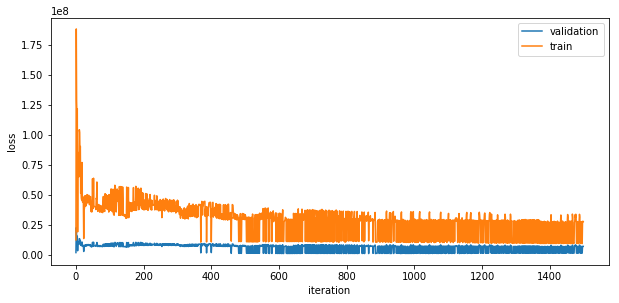

In [129]:
plt.subplot(2, 1, 2)
plt.plot(loss_val_history, label='validation')
plt.plot(loss_history, label='train')
plt.ylabel("loss")
plt.xlabel("iteration")
plt.legend()
plt.show()

In [130]:
val_preds = classifier.predict_all_data(X_test)
array = confusion_matrix(val_preds, y_test)
print("confusion matrix", array)
print("test accuracy", accuracy(array))

confusion matrix [[27  0]
 [13 74]]
test accuracy 0.8859649122807017
